In [8]:
from collections import namedtuple
import numpy as np

# The code below is found in the following GitHub repository: 
# https://github.molgen.mpg.de/mohomran/cityscapes/blob/master/scripts/helpers/labels.py#L55

#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).

    'trainId'     , # An integer ID that overwrites the ID above, when creating ground truth
                    # images for training.
                    # For training, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for you approach.
# Note that you might want to ignore labels with ID 255 during training.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'ground'          , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'ground'          , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'ground'          , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'ground'          , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , 34 ,       19 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

id_to_color = { label.id : np.asarray(label.color) for label in labels }

if __name__ == "__main__":
    print(id_to_color)

{0: array([0, 0, 0]), 1: array([0, 0, 0]), 2: array([0, 0, 0]), 3: array([0, 0, 0]), 4: array([0, 0, 0]), 5: array([111,  74,   0]), 6: array([81,  0, 81]), 7: array([128,  64, 128]), 8: array([244,  35, 232]), 9: array([250, 170, 160]), 10: array([230, 150, 140]), 11: array([70, 70, 70]), 12: array([102, 102, 156]), 13: array([190, 153, 153]), 14: array([180, 165, 180]), 15: array([150, 100, 100]), 16: array([150, 120,  90]), 17: array([153, 153, 153]), 18: array([153, 153, 153]), 19: array([250, 170,  30]), 20: array([220, 220,   0]), 21: array([107, 142,  35]), 22: array([152, 251, 152]), 23: array([ 70, 130, 180]), 24: array([220,  20,  60]), 25: array([255,   0,   0]), 26: array([  0,   0, 142]), 27: array([ 0,  0, 70]), 28: array([  0,  60, 100]), 29: array([ 0,  0, 90]), 30: array([  0,   0, 110]), 31: array([  0,  80, 100]), 32: array([  0,   0, 230]), 33: array([119,  11,  32]), 34: array([  0,   0, 142])}


In [9]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAvgPool2D, GlobalMaxPool2D, Conv2D, Conv2DTranspose, BatchNormalization, Activation, concatenate, MaxPool2D, multiply, add
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# from tensorflow.keras.losses import Dice
# try:
#     # Disable all GPUS
#     tf.config.set_visible_devices([], 'GPU')
#     visible_devices = tf.config.get_visible_devices()
#     for device in visible_devices:
#         assert device.device_type != 'GPU'
# except:
#     # Invalid device or cannot modify virtual devices once initialized.
#     pass

In [10]:
# ! pip install tensorflow[and-cuda]==2.16.1

In [11]:
# def load_and_preprocess_images(input_image_path, output_image_path):
    
#     input_image = tf.io.read_file(input_image_path)
#     input_image = tf.image.decode_image(input_image, channels=3, expand_animations = False) 
#     input_image = tf.image.resize(input_image, (128, 128))  
#     input_image = input_image / 255.0  

#     output_image = tf.io.read_file(output_image_path)
#     output_image = tf.image.decode_image(output_image, channels=3, expand_animations = False)  
#     if(output_image.shape[0] == None): 
#         print(output_image_path)
#     output_image = segmented_image_to_vector(output_image, id_to_color)
#     output_image = tf.image.resize(output_image, (128, 128)) 
#     output_image = output_image / 255.0  
#     # output_image = tfio.experimental.color.rgb_to_lab(output_image)

#     return input_image, output_image
  
class SegmentationDataGenerator(tf.keras.utils.Sequence):
  def __init__(self, image_paths, mask_paths, batch_size, shuffle=True, id_to_color=None):
    super().__init__()
    self.image_paths = image_paths
    self.mask_paths = mask_paths
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.id_to_color = id_to_color
    self.indexes = np.arange(len(image_paths))

  def __len__(self):
    return int(np.floor(len(self.image_paths) / self.batch_size))

  def __getitem__(self, index):
    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
    if self.shuffle:
      np.random.shuffle(indexes)
    image_paths = [self.image_paths[i] for i in indexes]
    mask_paths = [self.mask_paths[i] for i in indexes]

    # Load and preprocess images and masks
    x = [tf.io.read_file(path) for path in image_paths]
    x = [tf.image.decode_image(img, channels=3, expand_animations=False) for img in x]
    x = tf.image.resize(x, (128, 128)) 
    x = x / 255.0

    y = [tf.io.read_file(path) for path in mask_paths]
    y = [tf.image.decode_image(img, channels=3, expand_animations=False) for img in y]
    y = tf.image.resize(y, (128, 128))
    y = [segmented_image_to_vector(img, id_to_color) for img in y]

    return np.stack(x), np.stack(y)

def get_image_path_list(path, endswith):
    image_path_list = []
    for folder in os.listdir(path):
        image_path_list.extend([ os.path.join(os.path.join(path,folder), filename) for filename in os.listdir( os.path.join(path, folder) ) if filename.split("_")[-1] == endswith ])
    return image_path_list

def segmented_image_to_vector(segmented_image, id_to_color):
    # plot_image(segmented_image)
    mask = np.full( segmented_image.shape[:2], -1, dtype=int)
    closest_distances = np.full( segmented_image.shape[:2], np.inf)
    for id, color in id_to_color.items():
        distance =  np.linalg.norm(segmented_image - np.array(color).reshape(1, 1, -1), axis=-1)
        is_closer = closest_distances > distance
        mask = np.where( is_closer , id, mask)
        closest_distances = np.where( is_closer, distance, closest_distances)
    return tf.keras.utils.to_categorical(mask, len(id_to_color))
    # return mask


def plot_image( img, gray = False ):
    plt.figure( figsize = ( 10 ,10 ) )
    if gray:
        plt.imshow( img, cmap="gray") 
    else:
        plt.imshow( img )           
    plt.show()

# sorted(get_image_path_list("Cityscapes/train", "color.png"))[0]
# input_image = tf.io.read_file(sorted(get_image_path_list("Cityscapes/train", "color.png"))[0])
# input_image = tf.image.decode_image(input_image, channels=3, expand_animations = False)


train_input_image_paths = sorted(get_image_path_list("Cityscapes/train", "leftImg8bit.png"))
train_segmented_image_paths = sorted(get_image_path_list("Cityscapes/train", "color.png"))

val_input_image_paths = sorted(get_image_path_list("Cityscapes/val", "leftImg8bit.png"))
val_segmented_image_paths = sorted(get_image_path_list("Cityscapes/val", "color.png"))

train_gen = SegmentationDataGenerator(train_input_image_paths, train_segmented_image_paths, batch_size=8)

test_gen = SegmentationDataGenerator(val_input_image_paths, val_segmented_image_paths, batch_size=8)
# input_image_path_dataset = tf.data.Dataset.from_tensor_slices(input_image_paths)
# segmented_image_path_dataset = tf.data.Dataset.from_tensor_slices(segmented_image_paths)
# dataset = tf.data.Dataset.zip(input_image_path_dataset, segmented_image_path_dataset)

# dataset = dataset.map(load_and_preprocess_images)
# dataset = dataset.shuffle(buffer_size=1000)  
# test_dataset = dataset.take(700)
# train_dataset = dataset.skip(700)

# train_dataset = train_dataset.batch(32) 
# test_dataset = test_dataset.batch(32) 

# plot_image(segmented_image_to_vector(input_image, id_to_color), True)
# plot_image(input_image)
# len(get_image_list("Cityscapes/train", "color.png"))
# # [ filename for filename in os.listdir( os.path.join("Cityscapes/train", "cologne") ) if filename.split("_")[-1] == "leftImg8bit.png" ]

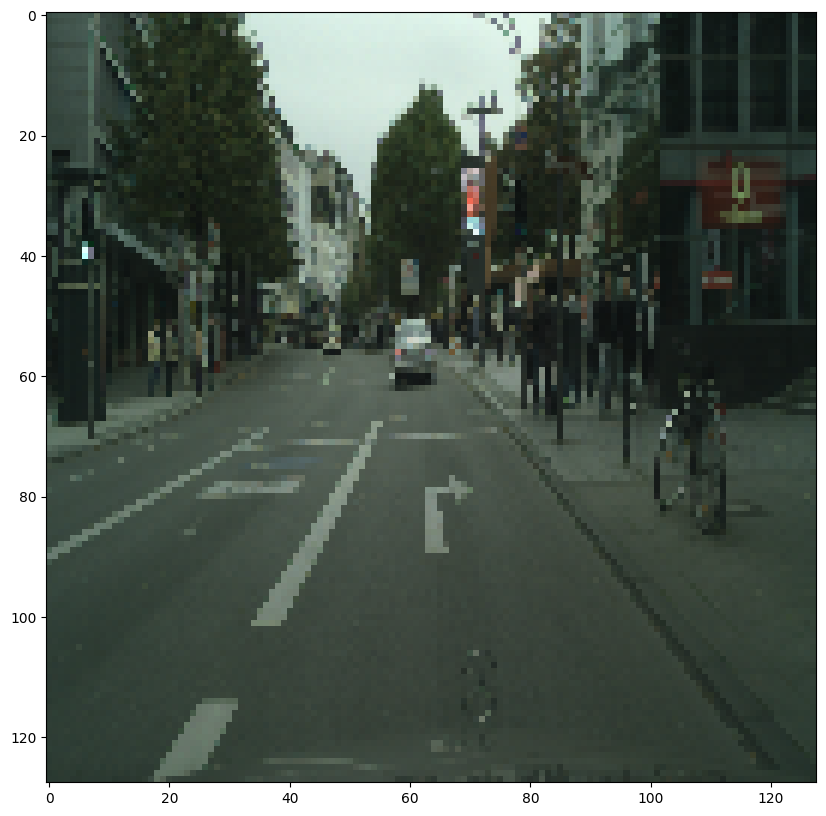

In [12]:
batch =  train_gen.__getitem__(2)
inp, out = batch
input = inp[4]
output = out[0]
plot_image(input)

In [13]:
class SqueezeAndExcitationBlock(tf.keras.layers.Layer):
    def __init__(self, channels, ratio = 16):
        super().__init__()
        self.squeeze = GlobalAvgPool2D()
        self.excitation = tf.keras.Sequential(
            [
                Dense( channels//ratio, activation="relu" ),
                Dense( channels, activation="sigmoid" )
            ]
        )
    
    def call(self, input):
        x = self.squeeze(input)
        x = self.excitation(x)
        return multiply([input,x])
    

class ConvBlock(tf.keras.layers.Layer):
    def __init__(self, n_filters, kernel_size):
        super().__init__()
        self.conv2D = Conv2D( n_filters, kernel_size=kernel_size, padding="same")
        self.batchnorm = BatchNormalization()
        self.activation = Activation("relu")

    def call(self, x):
        x = self.conv2D(x)
        x = self.batchnorm(x)
        x = self.activation(x)
        return x
    
class decoder_upsample_block(tf.keras.layers.Layer): #skip_features): 
    def __init__(self, num_filters , kernel_size):
        super().__init__()
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.convTranspose = Conv2DTranspose(self.num_filters, self.kernel_size, strides = 2, padding = 'same') 
        self.convBlock_1 =  ConvBlock(self.num_filters, self.kernel_size)
        self.convBlock_2 =  ConvBlock(self.num_filters, self.kernel_size)

    def call(self, input, skip_connection):
        x = self.convTranspose(input)
        x = concatenate( [ x , skip_connection ] )
        x = self.convBlock_1(x) 
        x = self.convBlock_2(x)
        return x
    
class encoder_downsample_block(tf.keras.layers.Layer):
    def __init__(self,num_filters, kernel_size):
        super().__init__()
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.convBlock_1 = ConvBlock(self.num_filters, self.kernel_size)
        self.convBlock_2 = ConvBlock(self.num_filters, self.kernel_size)
        self.maxPool = MaxPool2D(pool_size = (2,2), strides = 2)
    def call(self,x):
        x = self.convBlock_1(x)
        x = self.convBlock_2(x)
        x = self.maxPool(x)
        return x

In [23]:
class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio = 16):
        super().__init__()
        self.averagePool = GlobalAvgPool2D()
        self.maxPool = GlobalMaxPool2D()
        self.mlp = tf.keras.Sequential([
            Dense( channels // reduction_ratio, activation = "relu" ),
            Dense( channels, activation = "relu" )
        ])
        self.sigmoid = Activation("sigmoid")
    
    def call(self, input):
        global_avg_pool = self.averagePool(input)
        global_max_pool = self.maxPool(input)
        avg_pool_features = self.mlp(global_avg_pool)
        max_pool_features = self.mlp(global_max_pool)
        x = avg_pool_features + max_pool_features
        x = self.sigmoid(x)
        return x
    
class SpatialAttention(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.conv2D = Conv2D(1,kernel_size = (7,7), padding = "same" )
        self.sigmoid = Activation("sigmoid")
    
    def call(self, x):
        avg_pool = tf.reduce_mean(x, axis=-1)
        global_avg_pool = tf.expand_dims(avg_pool, axis=-1)

        max_pool = tf.reduce_max(x, axis=-1)
        global_max_pool = tf.expand_dims(max_pool, axis=-1)

        x = concatenate( [global_avg_pool, global_max_pool] )
        x = self.conv2D(x)
        x = self.sigmoid(x)
        return x
    
class CBAM( tf.keras.layers.Layer ):
    def __init__(self, channels, reduction_ratio = 16):
        super().__init__()
        self.channel_attention = ChannelAttention(channels, reduction_ratio)
        self.spatial_attention = SpatialAttention()
    def call(self, F):
        channel_attention = self.channel_attention(F)
        F_ = multiply([F,channel_attention])
        spatial_attention = self.spatial_attention(F_)
        F__ = multiply([F_, spatial_attention])
        return F__
         

In [15]:
class SEUnet( tf.keras.Model ):
    def __init__(self):
        super().__init__()
        self.encoderBlock_1 = encoder_downsample_block(num_filters=64, kernel_size=(5,5))
        self.down_SEBlock_1 = SqueezeAndExcitationBlock(channels=64)
        self.encoderBlock_2 = encoder_downsample_block(num_filters=128, kernel_size=(5,5))
        self.down_SEBlock_2 = SqueezeAndExcitationBlock(channels=128)
        self.encoderBlock_3 = encoder_downsample_block(num_filters=256, kernel_size=(3,3))
        self.down_SEBlock_3 = SqueezeAndExcitationBlock(channels=256)
        self.bottleneck = ConvBlock(512,(3,3))
        self.SEbottleneck = SqueezeAndExcitationBlock(channels=512)
        self.decoderBlock_1 = decoder_upsample_block(num_filters=256, kernel_size=(3,3))
        self.up_SEBlock_1 = SqueezeAndExcitationBlock( channels=256)
        self.decoderBlock_2 = decoder_upsample_block(num_filters=128, kernel_size=(5,5))
        self.up_SEBlock_2 = SqueezeAndExcitationBlock(channels=128)
        self.decoderBlock_3 = decoder_upsample_block(num_filters=64, kernel_size=(5,5))
        self.up_SEBlock_3 = SqueezeAndExcitationBlock(channels=64)
        self.final_conv_block = ConvBlock(35, (5,5))
    
    @tf.function
    def call(self, inputs):
        # print("UP "+ str(inputs.shape))
        down_1 = self.encoderBlock_1(inputs)
        down_SE_1 = self.down_SEBlock_1(down_1)
        down_2 = self.encoderBlock_2(down_SE_1)
        down_SE_2 = self.down_SEBlock_2(down_2)
        down_3 = self.encoderBlock_3(down_SE_2)
        down_SE_3 = self.down_SEBlock_3(down_3)
        bottleneck = self.bottleneck(down_SE_3)
        SEbottleneck = self.SEbottleneck(bottleneck)
        up_1 = self.decoderBlock_1(SEbottleneck, down_SE_2)
        up_SE_1 = self.up_SEBlock_1(up_1)
        up_2 = self.decoderBlock_2(up_SE_1, down_SE_1)
        up_SE_2 = self.up_SEBlock_2(up_2)
        up_3 = self.decoderBlock_3(up_SE_2, inputs)
        up_SE_3 = self.up_SEBlock_3(up_3)
        final_convBlock = self.final_conv_block(up_SE_3)
        # print(out.shape)
        return final_convBlock

In [29]:
class CBAMUnet( tf.keras.Model ):
    def __init__(self):
        super().__init__()
        self.encoderBlock_1 = encoder_downsample_block(num_filters=64, kernel_size=(5,5))
        self.down_CBAM_1 = CBAM(channels=64)
        self.encoderBlock_2 = encoder_downsample_block(num_filters=128, kernel_size=(5,5))
        self.down_CBAM_2 = CBAM(channels=128)
        self.encoderBlock_3 = encoder_downsample_block(num_filters=256, kernel_size=(3,3))
        self.down_CBAM_3 = CBAM(channels=256)
        self.bottleneck = ConvBlock(512,(3,3))
        self.SEbottleneck = CBAM(channels=512)
        self.decoderBlock_1 = decoder_upsample_block(num_filters=256, kernel_size=(3,3))
        self.up_CBAM_1 = CBAM( channels=256)
        self.decoderBlock_2 = decoder_upsample_block(num_filters=128, kernel_size=(5,5))
        self.up_CBAM_2 = CBAM(channels=128)
        self.decoderBlock_3 = decoder_upsample_block(num_filters=64, kernel_size=(5,5))
        self.up_CBAM_3 = CBAM(channels=64)
        self.final_conv_block = ConvBlock(35, (5,5))
    
    @tf.function
    def call(self, inputs):
        # print("UP "+ str(inputs.shape))
        down_1 = self.encoderBlock_1(inputs)
        down_SE_1 = self.down_CBAM_1(down_1)
        down_2 = self.encoderBlock_2(down_SE_1)
        down_SE_2 = self.down_CBAM_2(down_2)
        down_3 = self.encoderBlock_3(down_SE_2)
        down_SE_3 = self.down_CBAM_3(down_3)
        bottleneck = self.bottleneck(down_SE_3)
        SEbottleneck = self.SEbottleneck(bottleneck)
        up_1 = self.decoderBlock_1(SEbottleneck, down_SE_2)
        up_SE_1 = self.up_CBAM_1(up_1)
        up_2 = self.decoderBlock_2(up_SE_1, down_SE_1)
        up_SE_2 = self.up_CBAM_2(up_2)
        up_3 = self.decoderBlock_3(up_SE_2, inputs)
        up_SE_3 = self.up_CBAM_3(up_3)
        final_convBlock = self.final_conv_block(up_SE_3)
        # print(out.shape)
        return final_convBlock

In [17]:
from keras import backend as K
@tf.keras.saving.register_keras_serializable()
def dice_coef(y_true, y_pred):
  y_pred = tf.nn.softmax(y_pred)
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2. * intersection + 0.01) / (K.sum(y_true_f) + K.sum(y_pred_f) + 0.01)

@tf.keras.saving.register_keras_serializable()
def dice_coef_multilabel(y_true, y_pred, numLabels=35):
    dice=0
    for index in range(numLabels):
        dice += dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    return dice
     

In [18]:
unet = SEUnet()

unet.compile(
    optimizer=tf.keras.optimizers.AdamW(weight_decay = 0.0005, learning_rate = 0.001),
    loss= tf.keras.losses.CategoricalFocalCrossentropy(label_smoothing = 0.1, from_logits = True),
    metrics=['accuracy', dice_coef_multilabel]
)

In [30]:
cbam_unet = CBAMUnet()

cbam_unet.compile(
    optimizer=tf.keras.optimizers.AdamW(weight_decay = 0.0005, learning_rate = 0.001),
    loss= tf.keras.losses.CategoricalFocalCrossentropy(label_smoothing = 0.1, from_logits = True),
    metrics=['accuracy', dice_coef_multilabel]
)

In [13]:
# os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
            
# history = unet.fit(
#     train_gen,
#     epochs=20,
#     validation_data=test_gen
# )

2024-06-13 02:43:26.374073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-06-13 02:43:28.027216: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Epoch 1/20


2024-06-13 02:43:37.833449: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f122ac97e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-13 02:43:37.833498: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-06-13 02:43:37.838555: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-13 02:43:37.915657: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-13 02:43:40.802957: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more

371/371 [==============================] - 351s 901ms/step - loss: 0.4937 - accuracy: 0.5872 - dice_coef_multilabel: 0.2681 - val_loss: 0.4251 - val_accuracy: 0.6400 - val_dice_coef_multilabel: 0.3000
Epoch 2/20
371/371 [==============================] - 344s 927ms/step - loss: 0.3650 - accuracy: 0.7014 - dice_coef_multilabel: 0.3141 - val_loss: 0.3316 - val_accuracy: 0.7315 - val_dice_coef_multilabel: 0.3252
Epoch 3/20
371/371 [==============================] - 332s 893ms/step - loss: 0.2946 - accuracy: 0.7593 - dice_coef_multilabel: 0.3472 - val_loss: 0.2930 - val_accuracy: 0.7493 - val_dice_coef_multilabel: 0.3522
Epoch 4/20
371/371 [==============================] - 342s 923ms/step - loss: 0.2678 - accuracy: 0.7733 - dice_coef_multilabel: 0.3781 - val_loss: 0.2691 - val_accuracy: 0.7661 - val_dice_coef_multilabel: 0.3892
Epoch 5/20
371/371 [==============================] - 334s 900ms/step - loss: 0.2501 - accuracy: 0.7904 - dice_coef_multilabel: 0.4118 - val_loss: 0.2578 - val_acc

In [31]:
history = cbam_unet.fit(
    train_gen,
    epochs=20,
    validation_data=test_gen
)

2024-06-14 05:00:15.741382: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-06-14 05:00:18.534199: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Epoch 1/20


2024-06-14 05:00:31.104828: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcad4ea5a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-14 05:00:31.104888: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-06-14 05:00:31.127326: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-14 05:00:31.244230: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-14 05:00:34.485036: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more

371/371 [==============================] - 340s 863ms/step - loss: 0.4778 - accuracy: 0.6366 - dice_coef_multilabel: 0.2633 - val_loss: 0.4011 - val_accuracy: 0.7012 - val_dice_coef_multilabel: 0.2987
Epoch 2/20
371/371 [==============================] - 333s 898ms/step - loss: 0.3549 - accuracy: 0.7262 - dice_coef_multilabel: 0.3111 - val_loss: 0.3312 - val_accuracy: 0.7297 - val_dice_coef_multilabel: 0.3242
Epoch 3/20
371/371 [==============================] - 328s 885ms/step - loss: 0.2962 - accuracy: 0.7615 - dice_coef_multilabel: 0.3482 - val_loss: 0.2872 - val_accuracy: 0.7605 - val_dice_coef_multilabel: 0.3680
Epoch 4/20
371/371 [==============================] - 316s 850ms/step - loss: 0.2674 - accuracy: 0.7793 - dice_coef_multilabel: 0.3803 - val_loss: 0.2672 - val_accuracy: 0.7704 - val_dice_coef_multilabel: 0.3932
Epoch 5/20
371/371 [==============================] - 312s 840ms/step - loss: 0.2501 - accuracy: 0.7945 - dice_coef_multilabel: 0.4121 - val_loss: 0.2592 - val_acc

In [32]:
unet.save('unet.keras')

In [ ]:
cbam_unet.save('cbam_unet.keras')

In [ ]:
unet.load_weights("unet.keras")

In [34]:
cbam_unet.load_weights("cbam_unet.keras")

In [ ]:
unet.predict(inp)

1/1 [==============================] - 2s 2s/step


array([[[[4.3574076 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [4.0984898 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [4.3622894 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [4.080956  , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [3.922475  , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [3.5092876 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[3.84089   , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [2.6720119 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [2.6268132 , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [2.472157  , 0.        , 0.        , ..., 0.        ,
          0.        , 0. 

1/1 [==============================] - 1s 739ms/step
(8, 128, 128, 35)


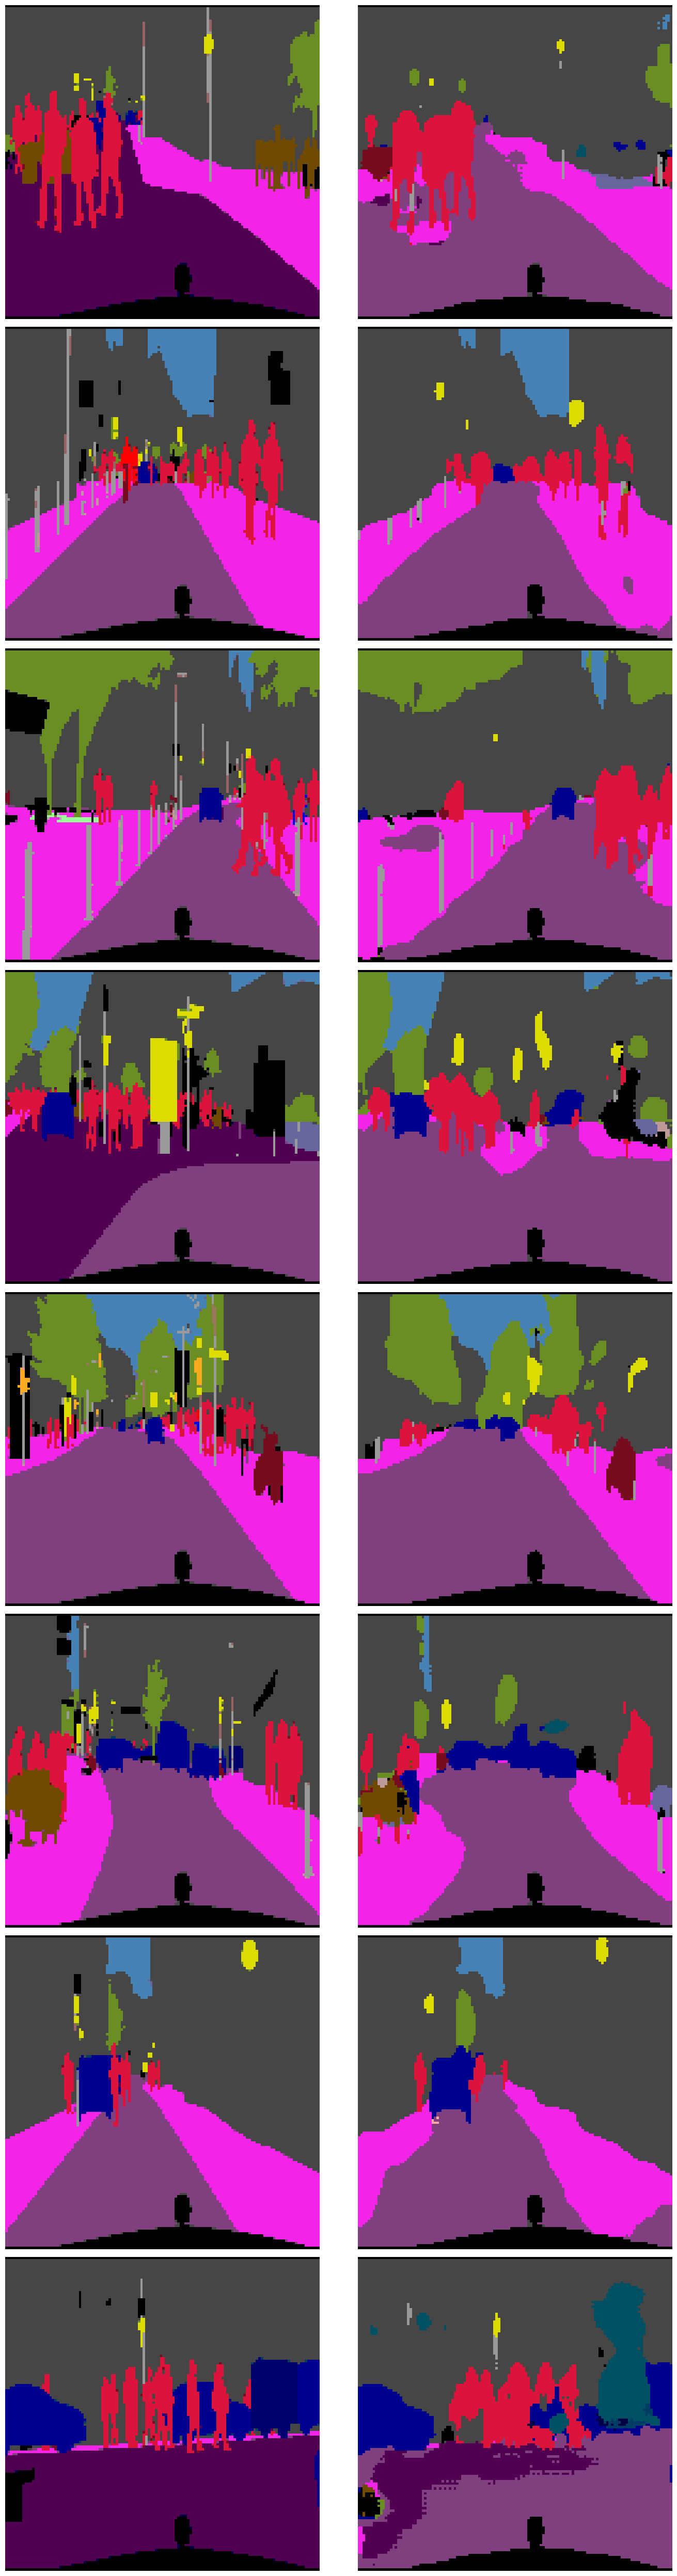

In [35]:
prediction = cbam_unet.predict(inp)
true_masks = np.argmax(out, axis = -1)
print(prediction.shape)
predictions = np.argmax(prediction, axis = -1)

fig, axes = plt.subplots(8, 2, figsize=(15, 50))

for index, (true_mask, prediction) in enumerate(zip(true_masks, predictions)):

    # Display the true mask
    temp = np.zeros([true_mask.shape[0], true_mask.shape[0], 3], dtype='uint8')
    for row in range(true_mask.shape[0]):
        for col in range(true_mask.shape[0]):
            temp[row, col, :] = id_to_color[true_mask[row, col]]

    axes[index, 0].imshow(temp)
    axes[index, 0].axis('off')
    # Display the corresponding prediction
    temp = np.zeros([prediction.shape[0], prediction.shape[0], 3], dtype='uint8')
    for row in range(prediction.shape[0]):
        for col in range(prediction.shape[0]):
            temp[row, col, :] = id_to_color[prediction[row, col]]

    axes[index, 1].imshow(temp)
    axes[index, 1].axis('off')

plt.tight_layout()
plt.show()